In [68]:
import os
import pandas as pd 
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

SCRIPT_DIRECTORY = os.path.realpath("")
HOME_DIRECTORY = os.path.split(SCRIPT_DIRECTORY)[0]
DATA_DIRECTORY = os.path.join(HOME_DIRECTORY, "data")
IMAGE_DIRECTORY = os.path.join(HOME_DIRECTORY, "images")

In [70]:
plt.style.use('seaborn')
plt.rcParams['font.size'] = 16.0
sns.set_style('dark')

In [77]:
path = f"{DATA_DIRECTORY}/spark_data.csv"
efficiency = pd.read_csv(path)
efficiency.columns = ['samples', 'filter', 'count', 'old', 'new', 'groupby']

In [78]:
efficiency.head(10)

,samples,filter,count,old,new,groupby
0,10,0.174447,11.901860,5.373487,3.258242,0.020794
1,20,0.002563,0.646884,6.372224,3.247886,0.009062
2,30,0.002174,0.691812,6.150756,3.545569,0.008183
3,40,0.001795,0.810549,5.228782,3.425594,0.007119
4,50,0.001924,0.694515,5.221654,3.598898,0.007174
5,100,0.001628,0.670903,5.410603,3.279784,0.007011
6,200,0.001527,0.684442,5.205014,3.775539,0.007256
7,300,0.001724,0.677109,5.376958,3.343629,0.007951
8,400,0.001579,0.745176,5.237569,3.544410,0.007183
9,500,0.001410,0.695152,5.284103,3.136818,0.007384


In [72]:
efficiency['filter'].values

array([0.17444658, 0.00256276, 0.00217438, 0.00179505, 0.0019238 ,
       0.00162768, 0.00152707, 0.00172424, 0.00157881, 0.00141001,
       0.00153923, 0.00141621, 0.0014267 , 0.00148058, 0.00167847,
       0.0014298 , 0.00132251, 0.00135803, 0.00130057, 0.00157046,
       0.00143003, 0.00118995, 0.00125694, 0.00139451, 0.00151873,
       0.00132465, 0.00128365, 0.00129986, 0.00129294, 0.00126696])

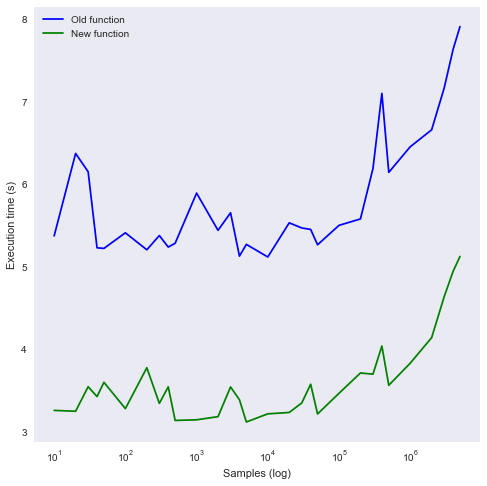

In [83]:
fig, axes = plt.subplots(figsize=(8,8))

colors = ['b', 'g']
for i, column in enumerate(['old', 'new']):
    x = efficiency['samples'].values
    axes.plot(x, efficiency[column].values, color=colors[i], label = f"{column.capitalize()} function")
axes.legend(loc='best')
axes.set_xscale('log')
axes.set_xlabel("Samples (log)")
axes.set_ylabel("Execution time (s)")
plt.savefig(f"{IMAGE_DIRECTORY}/functions.png", dpi=120)

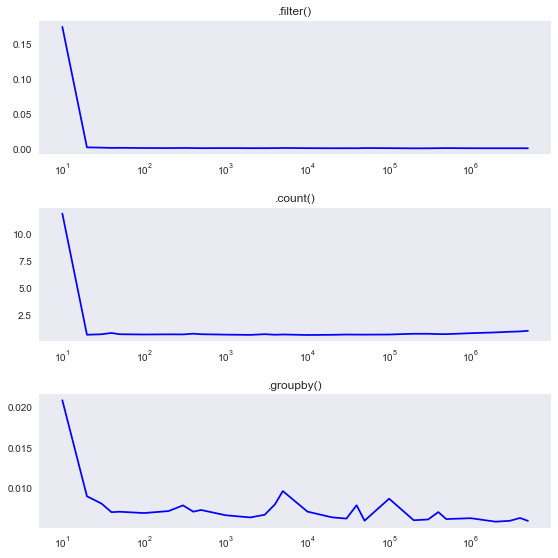

In [80]:
plots = ['filter', 'groupby', 'count']
fig, axes = plt.subplots(len(plots), 1, figsize=(8,8))

for i, column in enumerate(plots):
    ax = axes[i]
    x = efficiency.samples.values
    ax.plot(x, efficiency[column].values, color='b')
    ax.set_xscale('log')
    ax.set_title(f".{column}()")
fig.tight_layout(pad=1)

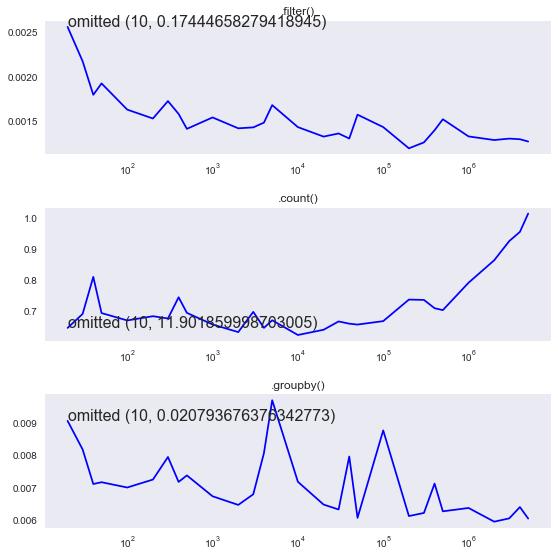

In [87]:
fig, axes = plt.subplots(len(plots), 1, figsize=(8,8))

for i, column in enumerate(plots):
    ax = axes[i]
    x = efficiency.samples.values
    y = efficiency[column].values
    ax.plot(x[1:], y[1:], color='b')
    ax.set_xscale('log')
    ax.set_title(f".{column}()")
fig.tight_layout(pad=1)